### [Callbacks](https://www.youtube.com/watch?v=o8bVb9NYzDw):
* Keras callbacks allow user-defined methods to customize the behavior of a Keras model during training, evaluation, or inference.

In [1]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.optimizers import Adam

In [2]:
# Simple Data for verifying the workings of Keras callbacks
X = np.array([0,1,2,3,4,5,6])
y = 2 * X + 5 

# Our aim is to find the slope(2) and bias(5) using NN

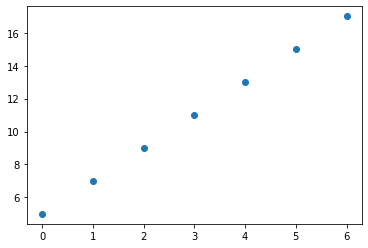

In [3]:
plt.scatter(X, y)

In [18]:
# Defining the architecture of NN model
model = Sequential()

model.add(Dense(3, input_dim = 1, activation = 'linear', kernel_initializer='glorot_uniform', bias_initializer="zeros"))

adam = Adam(learning_rate = 0.01)

model.compile(optimizer = adam,
              loss = 'mse',
              metrics = ['mse'])

In [19]:
model.get_weights()

[array([[-0.45014787,  0.48379672,  0.9952096 ]], dtype=float32),
 array([0., 0., 0.], dtype=float32)]

In [20]:
model.fit(X, y, epochs = 10, batch_size = 3)

Epoch 1/10
3/3 [==============================] - 0s 4ms/step - loss: 114.5603 - mse: 114.5603
Epoch 2/10
3/3 [==============================] - 0s 4ms/step - loss: 111.7477 - mse: 111.7477
Epoch 3/10
3/3 [==============================] - 0s 3ms/step - loss: 109.3320 - mse: 109.3320
Epoch 4/10
3/3 [==============================] - 0s 4ms/step - loss: 107.0891 - mse: 107.0891
Epoch 5/10
3/3 [==============================] - 0s 4ms/step - loss: 104.4430 - mse: 104.4430
Epoch 6/10
3/3 [==============================] - 0s 3ms/step - loss: 102.0526 - mse: 102.0526
Epoch 7/10
3/3 [==============================] - 0s 5ms/step - loss: 100.0689 - mse: 100.0689
Epoch 8/10
3/3 [==============================] - 0s 4ms/step - loss: 97.6148 - mse: 97.6148
Epoch 9/10
3/3 [==============================] - 0s 4ms/step - loss: 95.6473 - mse: 95.6473
Epoch 10/10
3/3 [==============================] - 0s 3ms/step - loss: 93.5233 - mse: 93.5233


In [21]:
# Defining the callback

slope_values = []
bias_values = []

# Class and method to add weights and bias values
class get_model_weights(Callback):
    def on_epoch_end(self, batch, logs):
        slope, bias = model.get_weights()
        slope_values.append(slope[0][0])
        # print(slope[0][0])
        bias_values.append(bias[0])
callback = get_model_weights()

In [ ]:
model.fit(X, y, epochs = 300, 
          verbose = False, 
          callbacks=[callback])

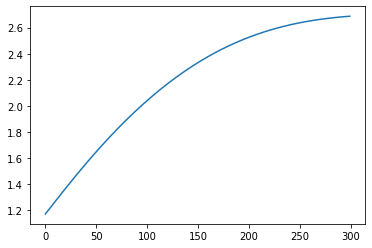

In [14]:
# plotting slope values
plt.plot(slope_values)

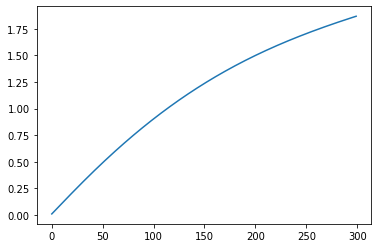

In [15]:
# bias values
plt.plot(bias_values)